# <center>Pokemon Type Principal Component Analysis</center>

#### <center>SeungU Lyu</center>
#### <center>May 6, 2019</center>
#### <center>Linearity 1 Final Project</center>



## Introduction

The Pokemon game has been loved by a lot of gamers for more than 20 years. The game seems like a pretty simple game where the goal is just to catch and raise different kinds of pokemon to eventually defeat the champion. However, there is a lot of math going on behind the scene, with hidden data consisting of thousands of numbers. There are even professional players who do data analysis on the massive dataset that had accumulated for the time span of 20 years, with currently more than 800 different kinds of pokemon.

In [1]:
import pandas as pd
ex = pd.read_csv("pokemon.csv")
ex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The goal for my final project was to do data analysis using PCA(Principal Component Analysis) on a dataset. While looking for possible candidates for the dataset, I realized that data from Pokemon might actually be a good source to do data analysis, since it is made with the appropriate size (about 800 rows) and with different components like "HP", "Attack", "Defense", and so on. I decided to use the data to figure out the relationship of stats between different types of pokemon. 

<img src="type.png" alt="Drawing" style="width: 400px;"/>

Pokemon consists of 18 different types, and they are known to have different characteristics. For example, steel type is known to have generally high defense, while fighting type is known to have high attack. People always discuss over which is the strongest type, and which is the weakest type. People usually assume that the dragon is strong, and the bug is weak. Is this rumor true? What would be the relationship between each type? It is easy to compare types one by one, but since there is a total of 6 different stats so when it comes to comparing 18 types with 6 different stats, it is pretty hard to see the relationship as a whole.

This is the part where PCA works the best. Hopefully, by using PCA, I'll be able to compress and visualize all this data into a simple 2D plane, where I can start my analysis. Also in this way, I can focus on the type itself instead of the individual pokemon. As a result, I decided to only use data from the pokemon in their final evolution form, to get rid of any redundant data. After that, I calculated average values for six different stats (HP, ATK, DEF, SPK, SEF, SPD) for each type, creating an 18*6 matrix ready to be compressed with PCA.

## What and why PCA?

PCA is a widely used method to reduce the dimensionality of a large data set. It transforms a large set of variables into smaller ones that still contains most of the information that exists in the large data set. For example, let's think of a dataset with different sets of variables. If the data has only one variable, it can be plotted on a line to show the relationships between each data. If there are two variables, you can plot them on 2D-plane. The same case happens for the three variables, you can depict them on a 3D graph. However, what about more than three variables? What if data has hundreds of different variables? It becomes almost impossible to see the relationship between each data due to having too many dimensions. 

PCA does its job here. It reduces the dimension of these datasets into much a smaller dimension, like two or three. By doing this, there is some information lost during the process, because it cannot be 100% accurate. However, this method creates simplicity over the accuracy, making it possible to analyze the data much easier after the process. We can actually visualize the data, and determine the relationship between each data with our own eyes if they are accurate enough. 

So, the overall idea of PCA is simple - reduce the number of variables inside a dataset without losing a lot of information, so that we can explore and analyze them better.


## What is the goal?

The final goal for this project is to perform PCA on the initial set of data with different stats for each pokemon to create 2D plot at the end with two different principal components. Data from 6 different stats will be compressed into two components, which will hopefully show the relationship between each type according to their original stats.

## Methodology

In [2]:
import numpy as np   
df = pd.read_csv("pokeke4.csv")
df

,HP,ATK,DEF,STK,SEF,SPD,TYPE
0,87.0,89.0,86.8,90.8,85.3,73.5,Water
1,71.7,103.6,138.4,79.1,90.6,65.3,Steel
2,76.6,107.1,112.2,76.0,92.7,67.1,Rock
3,82.5,87.0,78.1,110.7,99.3,91.2,Psychic
4,81.5,92.0,81.9,76.3,79.8,75.7,Poison
5,87.7,88.2,72.3,67.2,76.1,85.1,Normal
6,80.8,82.3,83.5,89.9,91.1,76.2,Ice
7,87.0,114.1,101.9,73.2,77.7,75.1,Ground
8,81.1,90.9,83.1,95.0,83.7,75.7,Grass
9,76.4,89.8,98.7,91.4,91.4,73.4,Ghost


Above is the initial dataset with average stats for each Pokemon type. A higher number means higher stats, which shows how strong the pokemon is with that particular status. For example, we can see from the data that on average Water type has a higher speed than Steel type pokemon. This means that Water type usually are faster than Steel type, having more chance at attacking before the opponent. 

### Step 1: Standardization

The first thing to do with our data is 'Standardization'. This process is done to standardize each variable so that they will contribute equally to the analysis. If there are a large difference between the ranges of the initial variable, there are chances that the variables with large difference overwhelm all the other variables, thus creating an analysis that is less accurate. To avoid this situation, we scale down each variable to the same range by using the standard deviation.


<img src="files/standard.png">

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['HP', 'ATK', 'DEF', 'STK', 'SEF', 'SPD']
x = df.loc[:, features].values
y = df.loc[:,['TYPE']].values

x = StandardScaler().fit_transform(x)

In [4]:
dataset = pd.DataFrame({'HP':x[:,0],'ATK':x[:,1], 'DEF':x[:,2], 'STK':x[:,3], 'SEF':x[:,4], 'SPD':x[:,5]})
dataset.head()

,HP,ATK,DEF,STK,SEF,SPD
0,0.814377,-0.552742,-0.093139,0.080931,-0.234102,-0.575847
1,-1.154713,0.615887,3.146856,-0.638230,0.438588,-1.227649
2,-0.524090,0.896038,1.501742,-0.828776,0.705125,-1.084570
3,0.235233,-0.712829,-0.639418,1.304119,1.542814,0.831092
4,0.106534,-0.312613,-0.400813,-0.810336,-0.932176,-0.400973


After standardization, the data will look like the array above. All the values will be scaled down, but still keeping the relationship between each variable. Now all the data will be centered around the point (0,0) when we create a plot.

### Step 2: Covariance Matrix

For this step, we aim to create a covariance matrix from the standardized dataset. This step is done to know the relationship between each variable. Sometimes, variables correlate to other specific variables, showing the tendency to change at the same time as those variables change. Covariance Matrix is a symmetric matrix - so if there are 'n' variables, size of the covariance matrix will be 'n x n' to show all the possible pairs of initial variables.


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TYPE']]], axis = 1)

In [6]:
pd.DataFrame(data=pca.get_covariance(), index = ['HP','ATK','DEF','STK','SEF','SPD'], columns = ['HP','ATK','DEF','STK','SEF','SPD'])

,HP,ATK,DEF,STK,SEF,SPD
HP,0.907779,0.119268,0.049747,0.405919,0.399198,0.148032
ATK,0.119268,0.879363,0.382399,-0.019206,0.224538,-0.235203
DEF,0.049747,0.382399,1.159476,-0.202002,0.173480,-0.422526
STK,0.405919,-0.019206,-0.202002,1.252722,0.467085,0.407022
SEF,0.399198,0.224538,0.173480,0.467085,1.128936,0.101398
SPD,0.148032,-0.235203,-0.422526,0.407022,0.101398,1.024666


This is the covariance matrix created from the standardized data above. The number on each cell tells you how each variable is related to each other - for example, defense and attack has a value of 0.38 for their covariance. This positive value means that they are correlated to each other, increasing at the same time but with a different ratio. In contrast, a negative value in the cell means two variables are not correlated to each other.

### Step 3: Principal Components - Eigenvalues and Eigenvectors of the Covariance Matrix

From the covariance matrix, we can finally extract the principal components of the data. Principal components are made as linear combinations of the initial variables in the way that they keep the original relationship between each variable. They are built so that different principal components are uncorrelated to each other, while the first principal component explains most of the variance.

<img src="files/PC.gif">

To do this, we have to find out an imaginary line that explains the maximum amount of variance, in the same word, lines that have the most information about the data. Since we standardized our data at the beginning, all the data is now centered around the origin (0,0). The picture above isn't from our data, but instead is a visualization of this process in a dataset with only 2 sets of variables. This picture briefly explains what it means to find out maximum variance. The distance between the line and a point shows the variance, and if the line satisfies the maximum possible variance by having the highest average of squared distances, that line is our first principal component!

To get the next principal components, we should find a line that satisfies next highest variance, while it is uncorrelated with the first principal component (for example, perpendicular line). By repeating this process, we can find up to 'n' number of PC with a dataset of 'n set of variables'.

In [7]:
pca2 = PCA(n_components=6)
principalComponents2 = pca2.fit_transform(x)
pd.DataFrame(data=pca2.components_, index = ['v1','v2','v3','v4','v5','v6'])

,0,1,2,3,4,5
v1,0.390182,-0.042280,-0.230584,0.648708,0.441781,0.420487
v2,0.247650,0.479358,0.627490,0.040096,0.433326,-0.354631
v3,-0.301734,-0.703931,0.099485,0.153864,0.437914,-0.433703
v4,0.732208,-0.160627,-0.387520,-0.257692,-0.039568,-0.468965
v5,-0.361555,0.422532,-0.595967,-0.230636,0.514366,-0.133428
v6,-0.168921,0.261870,-0.194531,0.659013,-0.398938,-0.521150


Other than guessing from visualization, what would be the best way to find out the principal components? Amazingly, this is the part where linearity takes place. From the covariance matrix we calculated from above, we can compute eigenvalues and eigenvectors. The eigenvectors of the covariance matrix actually are the vector that maximizes the variance between data, showing the direction of the principal components. So, eigenvectors v1, v2, v3, v4, v5, v6 can actually be written as vectors needed to calculate PC1, PC2, PC3, PC4, PC5, PC6.

In [8]:
pd.DataFrame(data=pca2.explained_variance_, index = ['λ1','λ2','λ3','λ4','λ5','λ6'])

,0
λ1,2.151847
λ2,1.816922
λ3,1.144196
λ4,0.902053
λ5,0.218810
λ6,0.119113


Then what are the eigenvalues of the covariance matrix? In fact, they are just simple coefficient that is attached to the eigenvectors, showing 'the amount of variance carried in each principal component'. The eigenvalues are aligned from big number to small number, so aligning eigenvectors that match the eigenvalues in the same order tells you which component is the first or second principal component. 

In [9]:
import matplotlib.pyplot as plt
scree = pd.DataFrame(data=pca2.explained_variance_ratio_, index = ['1','2','3','4','5','6'], columns = ['PC'])
plt.plot(scree)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of explained variance')
plt.show()

<Figure size 640x480 with 1 Axes>

However, it is uncommon to use all the principal components when visualizing the data, because it is completely unnecessary. For example, above is the scree plot created from my pokemon PCA according to the eigenvalues. It shows that the first and second principal component already explains about 65% of the total variance. We can even include the third component to raise it to 85% of the total variance, but 65% is generally enough to look at the tendency of the dataset, and it is harder to analyze when the data become 3D graph with three different components.

<img src="files/Pcal.png">

From the information above, we can now see how PC1 and PC2 is made out of. The result shows that pokemon type with high PC1 is likely to have higher HP, STK, SEF, and SPD, while low value at DEF. ATK value seems to be so small to actually make a big difference. Meanwhile, pokemon type with high PC2 is likely to have low speed but high at most other stats.

In [10]:
finalDf

,principal component 1,principal component 2,TYPE
0,0.069544,-0.015709,Water
1,-1.938678,2.583708,Steel
2,-1.270824,1.899000,Rock
3,2.146403,-0.258572,Psychic
4,-0.958887,-0.669206,Poison
5,-0.751830,-1.486545,Normal
6,0.208234,-0.359748,Ice
7,-1.308476,1.035838,Ground
8,-0.028301,-0.416298,Grass
9,-0.275125,0.485796,Ghost


At last, principal component analysis for this data is done.

### Step 4: Visualization

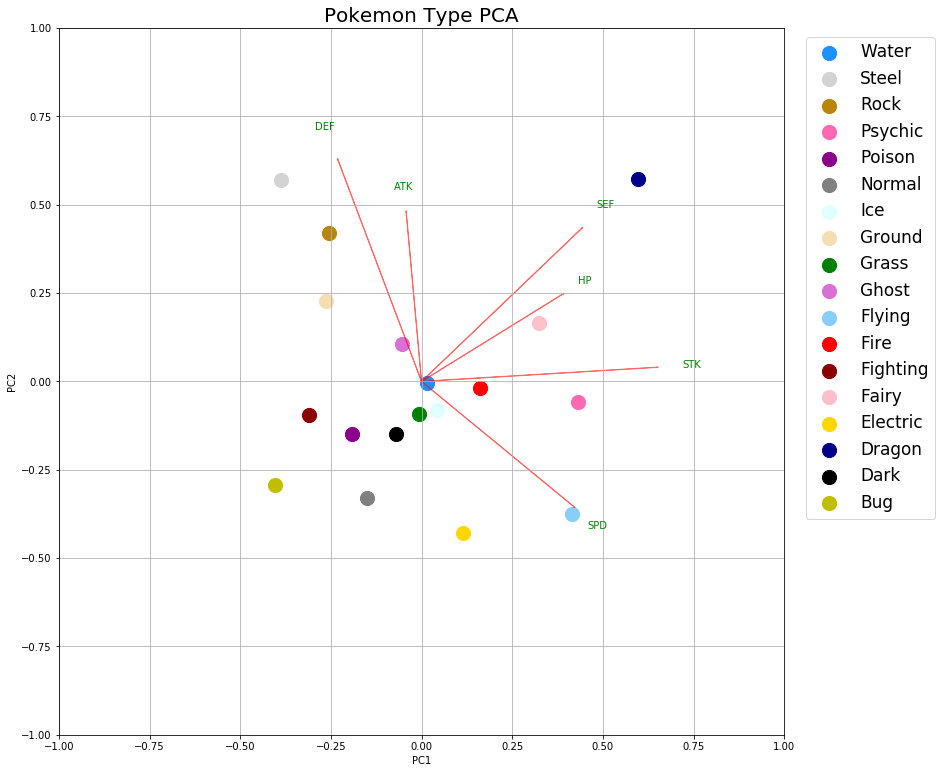

In [11]:
def myplot(score,coeff,labels=None):
    xs = score.iloc[:,:1].values
    ys = score.iloc[:,1:2].values
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = ['dodgerblue', 'lightgray', 'darkgoldenrod', 'hotpink', 'darkmagenta', 'grey', 'lightcyan', 'wheat', 'g', 'orchid', 'lightskyblue',
              'r', 'darkred', 'pink', 'gold', 'darkblue', 'black', 'y']
    
    for i in range(len(xs)):
        plt.scatter(xs[i] * scalex,ys[i] * scaley, c=colors[i], s=200)
        
    stats = ['HP', 'ATK', 'DEF', 'STK', 'SEF', 'SPD']

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, stats[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

fig= plt.figure(figsize=(13,13))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title('Pokemon Type PCA', fontsize = 20)
plt.grid()

myplot(finalDf, np.transpose(pca.components_[0:2, :]))
plt.legend(finalDf['TYPE'].values, bbox_to_anchor=(1.22, 1), prop={'size': 17})
plt.show()

Finally, we can visualize the data, which is now reduced to only two dimensions after PCA. PC1 as x-axis, PC2 as y-axis, each pokemon type is plotted on the grid with different colors. Loading vectors are also plotted to show how each variable is likely to be distributed along with the principal components. However, this PCA seems to not show the result very well. From the graph, we can see that the flying type has the highest speed, dragon type has the highest special defense, and steel and rock type has high defense stats. However, since each principal component is a complicated mixture of each stats, it is really hard to tell which type is necessarily better than other type or not. Also, we know that this information only explains 65% of the total variance, which might not be enough to explain what is generally happening. I feel like it is due to having too many variables in the beginning, and we need a little pivot to answer the primary inquiry.

### Step 5: Pivot

In [12]:
df = pd.read_csv("pokeke5.csv")
df

,CATK,CDEF,SPD,TYPE
0,89.9,86.4,73.5,Water
1,91.3,100.2,65.3,Steel
2,91.5,93.9,67.1,Rock
3,98.9,86.6,91.2,Psychic
4,84.2,81.1,75.7,Poison
5,77.7,78.7,85.1,Normal
6,86.1,85.1,76.2,Ice
7,93.6,88.9,75.1,Ground
8,92.9,82.6,75.7,Grass
9,90.6,88.8,73.4,Ghost


To make PCA more comprehensive and accurate, I decided to reduce the number of the initial variables by creating new stats from the previous data. Now, all the stats of the same kind are combined - Attack and special attack combined to create CATK, HP, defense, special defense combined to create CDEF, and lastly, just the speed. I will perform new PCA on this data to see what happens. 

In [13]:
features = ['CATK', 'CDEF', 'SPD']
x = df.loc[:, features].values
y = df.loc[:,['TYPE']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TYPE']]], axis = 1)
finalDf

,principal component 1,principal component 2,TYPE
0,-0.370346,-0.542793,Water
1,0.453183,-2.320691,Steel
2,0.086742,-1.619219,Rock
3,0.902077,0.538024,Psychic
4,-1.132397,0.053985,Poison
5,-1.542105,0.798960,Normal
6,-0.686596,-0.282436,Ice
7,0.150001,-0.662322,Ground
8,-0.325194,-0.037079,Grass
9,-0.150434,-0.770864,Ghost


The same overall process is done, and I was able to get a new array with principal components.

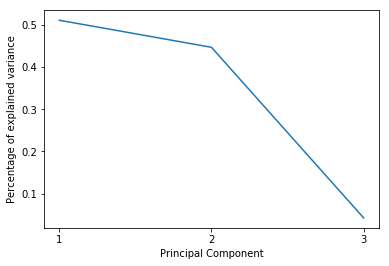

In [14]:
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(x)
scree = pd.DataFrame(data=pca2.explained_variance_ratio_, index = ['1','2','3'], columns = ['PC'])
plt.plot(scree)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of explained variance')
plt.show()

Looking at the new scree plot, this analysis looks much more reasonable. PC1 and PC2 explain more than 97% of the total variance, which means that statics wise we can completely ignore PC3 component. Thus, a new graph will be much more accurate than the one before.

<img src="files/Pcal2.png">

Using the same method again, we can figure out how each principal components are formed. Now PC1 shows the combination of all the stats, while PC2 mostly shows the relationship between combined defense and the speed. This is very good, thinking that PC1 shows general strength of specific type so that we can actually say type with higher PC1 has a high possibility of being stronger than other types. Also, PC2 shows the relationship between combined defense and speed. Type with higher PC2 is likely to have high speed and low defense, while opposite makes sense too.

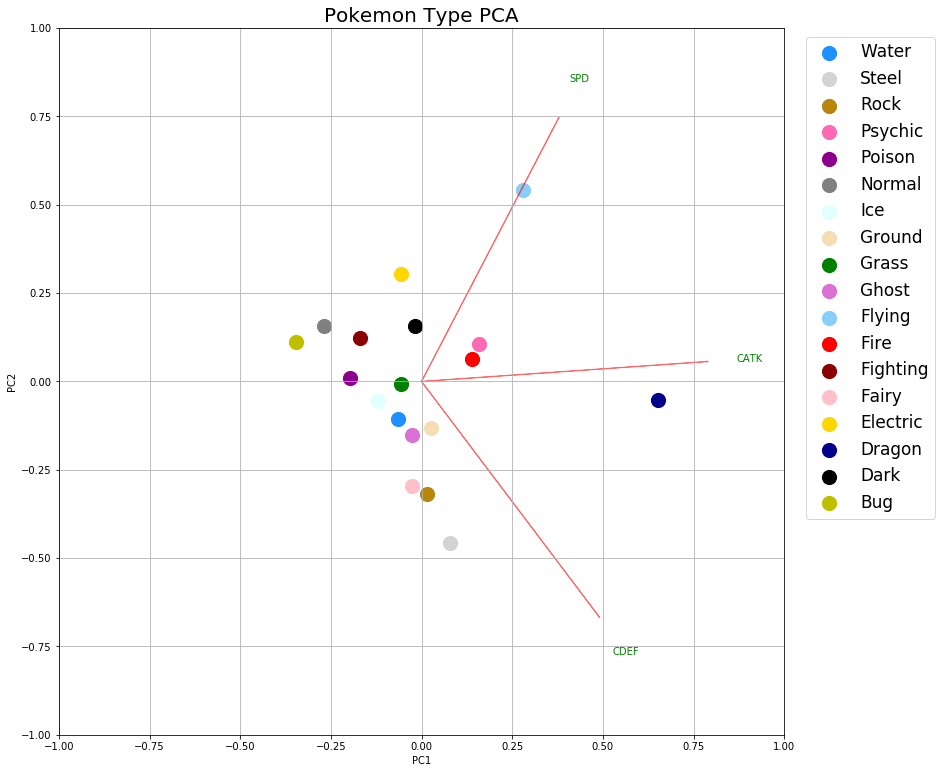

In [15]:
def myplot(score,coeff,labels=None):
    xs = score.iloc[:,:1].values
    ys = score.iloc[:,1:2].values
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = ['dodgerblue', 'lightgray', 'darkgoldenrod', 'hotpink', 'darkmagenta', 'grey', 'lightcyan', 'wheat', 'g', 'orchid', 'lightskyblue',
              'r', 'darkred', 'pink', 'gold', 'darkblue', 'black', 'y']
    
    for i in range(len(xs)):
        plt.scatter(xs[i] * scalex,ys[i] * scaley, c=colors[i], s=200)
        
    stats = ['CATK', 'CDEF', 'SPD']

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, stats[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

fig= plt.figure(figsize=(13,13))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title('Pokemon Type PCA', fontsize = 20)
plt.grid()

myplot(finalDf, np.transpose(pca.components_[0:2, :]))
plt.legend(finalDf['TYPE'].values, bbox_to_anchor=(1.22, 1), prop={'size': 17})
plt.show()

In fact, it seems like PCA has finally met my goal. Reducing three-dimensional data into two dimensions, we can now analyze the relationship between each data by looking at the 2D graph instead of a complicated 3D graph. By checking several types, types that align on the right side of the PC1 axis seems to have higher combined stat compared to other types. For example, the dragon type is placed the far right side of the graph because it has the highest combined stat among all the types. In contrast, bug type is placed far left, since it has the lowest combined stat. It might not be accurate since PC1 equation shows that it takes account the CATK twice than SPD, which means that types with high speed and the low attack have a lower chance of showing up on the right side. 

This is the reason why PC2 is important because PC2 gives more information about the relationship between CDEF and SPD more than PC1 did. Types with low speed but high CDEF, for example, steel type, is placed far down the PC2 axis. In contrast, flying type, with high speed but low CDEF, is placed high up on PC2 axis. Loading plots seem much more reasonable now, showing types with high values in specific stats lining up with the same direction of the loading vectors. 

## Results

The first tries on PCA did not work well. The data showed a tendency between each type, but it was not well organized to answer my question of "which type is better than the other type". So I tried again and simplified the initial source of data into three dimensions instead of six dimensions. Now the PCA graph plot became much more comprehensive, where I can actually analyze how each type is likely to be consist of.

For example, I can assume that electric type has a higher speed than combined defense, while it's combined attack stat is pretty much at average among all the types. Also, I can assume that flying type has the highest speed among all the types, while the defense is likely to be much lower than the average. Flying type can also be assumed to have a high combined attack since it is placed on the right side of the PC1 axis.

From the visualization, we can assume the top 3 types for each attribute:

#### Types with the highest combined attack: Dragon, Flying, Psychic or Fire

#### Types with highest combined defense: Steel, Rock, Dragon

#### Types with the highest speed: Flying, Electric, Dragon


My guess might not be right since principal components are a linear combination of variables with different coefficients. So for some extreme cases, my guess might not work. However, at the same time, doing all this process with standardization reduces the chance of having extreme cases at the end, making the guess much more accurate than just creating random linear combinations. 

This result might not seem super useful, because I can actually just check the data from the original file and rank them by highest stats. However, that is not the point of this analysis. An important fact about this is that dataset originally in three-dimensional form is reduced to two dimensions, thus becoming much easier to comprehend by both human and the computer. PCA actually is a method often used by people for ML (machine learning) purpose, due to the simplicity they create after the process. Also, if I were to do the same type-analysis among all the 800 different pokemon, it might be impossible to see the tendency just by looking at the data or the direct plotting. However, if I use PCA to create simple scatter plot with different colors for each type with 800 pokemon, we might be able to see something that might have not shown up just by looking at the data.

## Conclusion

It was a very interesting time to learn about Principal Component Analysis as the end of Linearity I class. It is very interesting to see how SVD (singular value decomposition) is deeply associated with PCA, but I avoided writing everything down to keep the analysis as simple as possible. One fact I realized about this tool is that PCA is in fact really simple but strong data compression method that can be used for massive sets of data. By choosing how many principal components to keep, you can manually control the accuracy of the data after analysis. Also, all the data is compressed to show just the relationship between the data, so you don't have to think about what the original values were at the beginning. However, it isn't a tool that is easy to comprehend. In fact, there are a lot of factors to consider when translating the visualizations that are in the form of scatter plots. It is easy once you understand the hidden values such as the eigenvectors or the eigenvalues behind the principal components. 

In general, I feel like the question and conclusion wasn't strong enough since the original question could have been solved even without using the help of the PCA process. Also, the massive dataset was compressed to smaller dataset even before performing PCA, making it even easier to comprehend. I took this project a chance to learn more about SVD and PCA, which was the parts that I struggled the most when I was taking the Linearity I class. In a sense of learning, I achieved a lot during the process. However, in the sense of the final result, I might be more satisfied if I were to do some extra analysis through with the same data, but in some different ways. 


## References

[1] D.P. Berrar, “Singular value decomposition and principal component analysis,” Kluwer: Norwell, MA, 2003. pp. 91-109. LANL LA-UR-02-4001 [Online]. Available: https://www.cs.cmu.edu/~tom/10701_sp11/slides/pca_wall.pdf. 
[Accessed Apr. 29, 2019].

[2] Alberto Barradas, “Pokemon with stats,” Kaggle, Aug. 22, 2016. [Online]. Available:. https://www.kaggle.com/abcsds/pokemon 
[Accessed Apr. 29, 2019].

[3] Jihun Jung, “PCA: Principal component analysis” June 19, 2018. [Online]. Available:
	https://rpubs.com/Evan_Jung/pca
	[Accessed Apr. 29, 2019].
    
[4] Zakaria Jaadi, “A step by step explanation of Principal Component Analysis” Feb 28. [Online]. Available: https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2
	[Accessed May. 5, 2019].
